In [8]:
from typing import Optional,List

# 100. Same Tree
DFS

In [4]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        if not p and not q:
            return True
        
        if not p or not q:
            return False

        if p.val != q.val:
            return False

        return self.isSameTree(p.left,q.left) and self.isSameTree(p.right,q.right)

# 101. Symmetric Tree
DFS和對稱邏輯

In [3]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:
        if not root:
            return True

        def isMirror(left: Optional[TreeNode], right: Optional[TreeNode]) -> bool:
            # 如果兩個子樹都是空的，它們是對稱的
            if not left and not right:
                return True
            if not left or not right:
                return False
            if left.val != right.val:
                return False

            #　遞歸檢查一個子樹的左子樹和另一個子樹的右子樹，和一個子樹的右子樹和另一個子樹的左子樹是否對稱
            return isMirror(left.left,right.right) and isMirror(left.right,right.left)

        return isMirror(root.left,root.right)

# 106. Construct Binary Tree from Inorder and Postorder Traversal

#### 中序遍歷(inorder)
1.以左子樹、根節點、右子樹的順序進行遍歷.

2.可以用來確定樹的結構，特別是用來確定左子樹和右子樹的邊界。

#### 後序遍歷(postorder)
1.以左子樹、右子樹、根節點的順序進行遍歷。

2.後序遍歷的最後一個元素總是樹的根節點。

In [9]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> Optional[TreeNode]:
        
        if not inorder or not postorder:
            return 

        # 從後序遍歷數組中取出最後一個元素作為根節點的值
        val = postorder.pop()
        root = TreeNode(val)

        # 在中序遍歷數組中找到根節點的索引
        index = inorder.index(val)

        # 先構建右子樹，因為後序遍歷的特性（根節點在最後）
        root.right = self.buildTree(inorder[index+1:],postorder[index:])
        root.left = self.buildTree(inorder[:index],postorder[:index])
        
        return root
    
# use list slice takes too long

In [ ]:
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> Optional[TreeNode]:
        
        inorder_index_map = {val: idx for idx, val in enumerate(inorder)}

        def helper(left:int,right:int) ->  Optional[TreeNode]:

            if left > right:
                return None
            
            val = postorder.pop()
            root = TreeNode(val)

            index  = inorder_index_map[val]

            # 構建右子樹（注意這裡先構建右子樹是因為後序遍歷的特性）
            root.right = helper(index + 1, right)
            root.left = helper(left, index-1)

            return root

        return helper(0, len(inorder) - 1)
    
# Change the function parameters to pass in int
        

# 117. Populating Next Right Pointers in Each Node II
BFS

In [13]:
class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next

class Solution:
    def connect(self, root: 'Node') -> 'Node':
        
        if not root:
            return None
        
        queue=[root]
        queue.append(None)
        
        while queue:
            node  = queue.pop(0)
            
            # 檢查當下的點是否為空值
            if node :
                # 只要非None值都一律指向下一個值(None也沒關係)
                node .next = queue[0]

                if node .left:
                    queue.append(node .left)
                if node .right:
                    queue.append(node .right)
            
            else:
                # 如果queue中還有node，代表還有下一層要跑，在最後面新增一個None
                # 反之沒有代表當下的None就是最後一個值
                if queue:
                    queue.append(None)
           
        return root 

# 114. Flatten Binary Tree to Linked List
step1. dfs

step2. set next

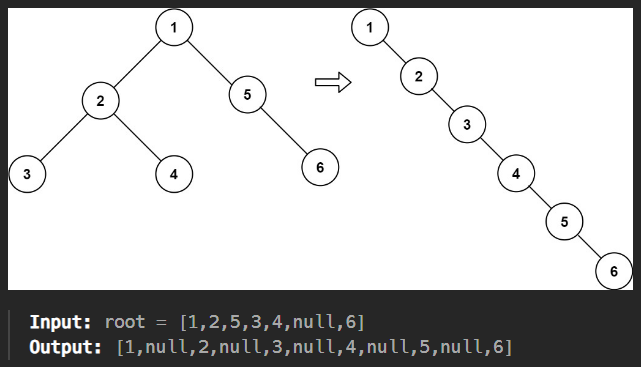

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def flatten(self, root: Optional[TreeNode]) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        result = []
        def traverse(node):
            if not node:
                return
            
            # pre-order traversal (dfs)
            result.append(node.value)  
            traverse(node.left)        
            traverse(node.right)       
        
        traverse(root)
        
        # set next
        for index , node in result:
            if index+1 < len(result)
                node.left = None
                node.right = result[index+1]

# 112. Path Sum

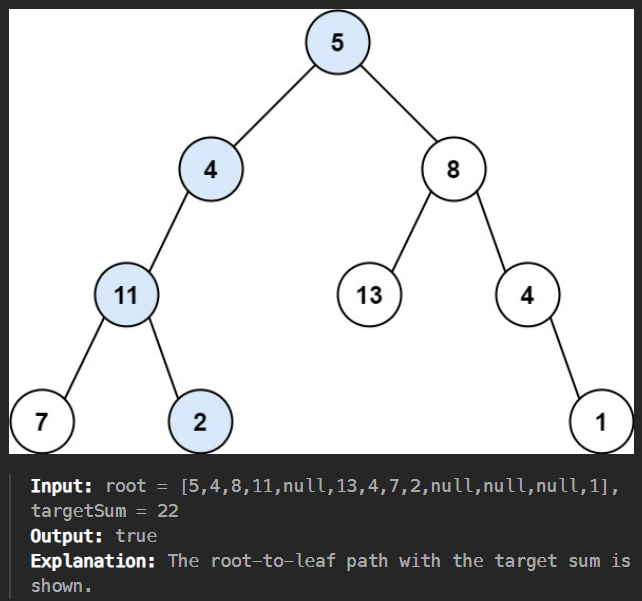

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:
        
        temp_sum=0
        def dfs(node: Optional[TreeNode],number: int)-> bool:
            if not node:
                return
            
            number+=node.val

            # Determine as leaf node
            if not node.left and not node.right:
                return number == targetSum
            
            return dfs(node.right,number) or dfs(node.left,number)           
        
        return dfs(root,temp_sum)

# 129. Sum Root to Leaf Numbers

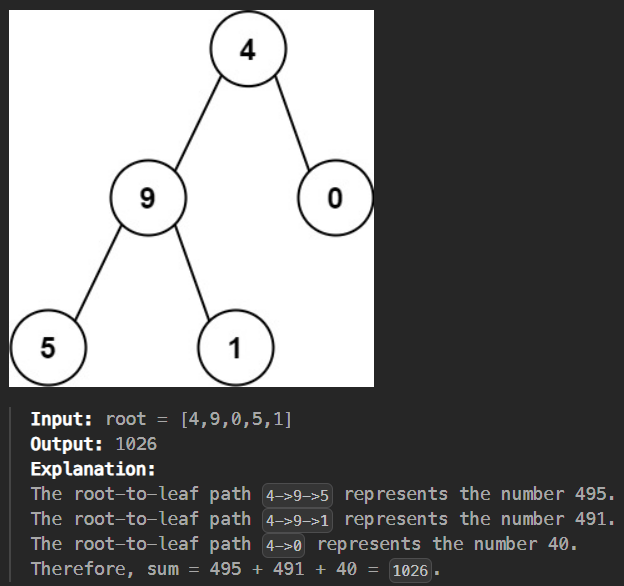

In [ ]:
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sumNumbers(self, root: Optional[TreeNode]) -> int:
        
        temp_sum = 0
        def dfs(node: Optional[TreeNode],current_sum: List)-> bool:
            if not node:
                return 0 # Because it is calculating the total

            # calculate current node value
            current_sum=current_sum*10+node.val

            if not node.left and not node.right:
                return current_sum
        
            return dfs(node.left,current_sum) + dfs(node.right,current_sum) 
        
        return dfs(root,temp_sum)
    
# 原本是用list去存node 但因為list的可變性不能這樣做